In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np

Loading the dataset using pandas library

In [2]:
df=pd.read_csv("Advertise.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


'info()' in pandas provides a concise summary of a DataFrame, including information on the data types, non-null values, and memory usage.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


'describe()' in pandas generates descriptive statistics of a DataFrame, such as count, mean, standard deviation, minimum, and maximum values.

In [4]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [5]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [6]:
#dropping of missing values column
df=df.drop("Unnamed: 0",axis=1)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


'describe()' in pandas generates descriptive statistics of a DataFrame, such as count, mean, standard deviation, minimum, and maximum values.

In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


'boxplot()' creates a box-and-whisker plot, visualizing the distribution of a dataset's values and highlighting the median, quartiles, and potential outliers.

<Axes: >

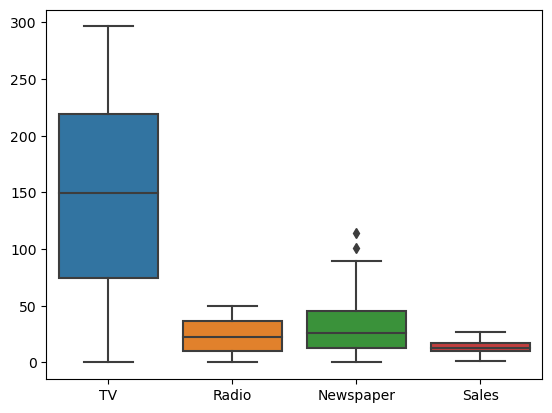

In [8]:
sns.boxplot(df)

'winsorize()' is used to remove outliers based on limits 

In [9]:
from scipy.stats.mstats import winsorize
upper_limit=0.05
lower_limit=0.05
df['Newspaper']=winsorize(df['Newspaper'],limits=(lower_limit,upper_limit))

<Axes: >

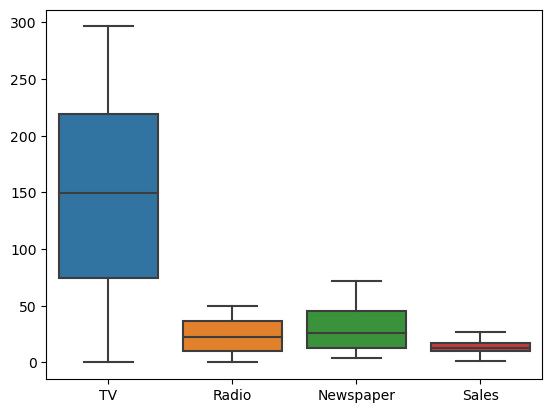

In [10]:
#After removing outliers
sns.boxplot(df)

'pairplot()' creates a grid of scatterplots for each pair of variables in a dataset, allowing for visual exploration of relationships and distributions.

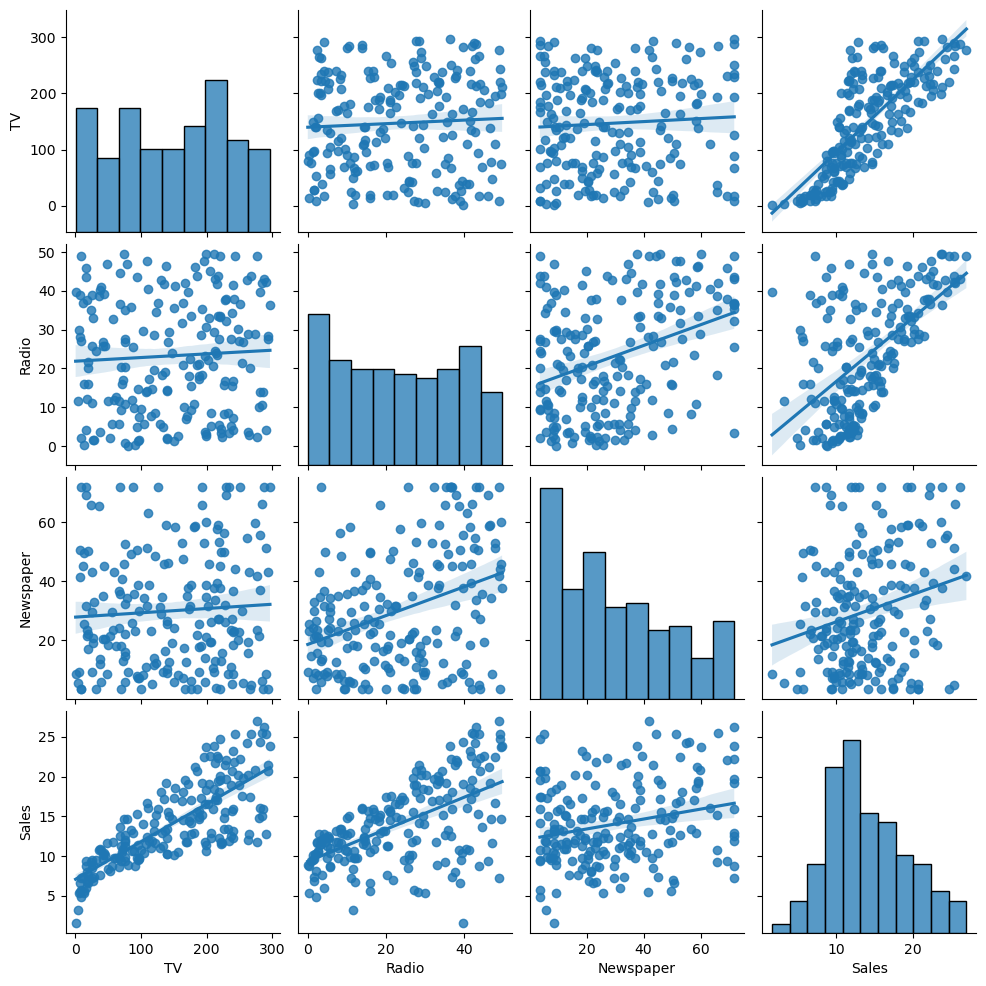

In [11]:
sns.pairplot(df,kind="reg")

In [12]:
#Normalize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = ['TV', 'Radio', 'Newspaper', 'Sales']
df[cols] = scaler.fit_transform(df[cols])
df.head()

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.955484,1.552053
1,-1.197376,1.082808,0.752217,-0.696046
2,-1.516155,1.528463,1.960477,-0.907406
3,0.052050,1.217855,1.421253,0.860330
4,0.394182,-0.841614,1.416261,-0.215683


In [13]:
#splitting of train and test data
from sklearn.model_selection import train_test_split
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


Model creation and Evaluation using Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred =model.predict(x_test)

In [15]:
from sklearn.metrics import r2_score,classification_report
r2=r2_score(y_test,y_pred)
print(r2)

0.8999521588333219


Model creation and Evaluation using RandomForestRegressor

In [16]:
from sklearn.ensemble import RandomForestRegressor
modell=RandomForestRegressor(n_estimators=10,random_state=0)
modell.fit(x_train,y_train)
y_predd=modell.predict(x_test)

In [17]:
score=r2_score(y_test,y_predd)
print(score)


0.9761148079026964
